In [ ]:
#Check if the library is already installed, and if it isn't, it installs it.
! [ -e /content ] && pip install -Uqq fastbook

In [ ]:
#importing the fastbook library and setting it up for use.
import fastbook
fastbook.setup_book()

# imports functions and modules from the fastbook library, so that they can be used in the code
# without having to reference
from fastbook import *
from fastai.vision.all import *

<AxesSubplot:>

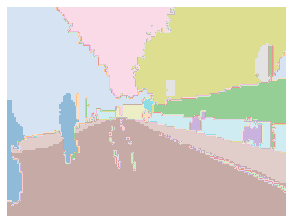

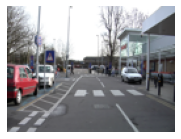

In [21]:
path = untar_data(URLs.CAMVID_TINY)

# see different components of the path

labels = path.ls()[0]
images = path.ls()[1]

mask = PILMask.create(labels.ls()[30])
mask.show(figsize=(5,5), alpha=.5)

img_f = images.ls()[30]
img = PILImage.create(img_f)
img.show()

In [ ]:
for i in range(0, len((path/'labels').ls())):
    img = PILImage.create((path/'labels').ls().sorted()[i])
    img.show()

In [ ]:
#displaying images
img_f = path/'images/0001TP_006690.png'
img = PILImage.create(img_f)
img.show()

  #displaying masks
mask = PILMask.create(path/'labels/0001TP_006690_P.png')
mask.show(figsize=(5,5), alpha=1)

#displaying the image and mask together
mask.show(ctx=img, alpha=1, figsize=(5,5))

In [ ]:

dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))